## Case Study Background
Show how different data features are 
correlated with the target variable. 
He's specifically interested in revealing the relationship 
between *movie rating* and *the time people spent on movie 
browsing* before making a decision regarding the movie bookings.

### About the dataset

Each row in this dataset captures a customer booking:
- `unit_price`: is the price per ticket
- `quantity`: is the number of tickets in that booking
- `time_on_site`: is the amount of seconds it takes between the customer first logged onto the site and when they finished placing the booking
- `movie_rating`: is the average customer rating of that movie (at the time of the booking)
- `label`: is the company's internal classification of that booking. 
    - `Low` if they booked <= 5 tickets; 
    - `Medium` if they booked between 6 and 10 tickets; 
    - and `High` if the purchase was more than 10 tickets.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('correlation.csv')
data.head()

unit_price  movie_rating  time_on_site  quantity label
0          25          6.98    129.402179         3   Low
1          25          8.09     96.931070         3   Low
2          25          7.56    102.937014         1   Low
3          25          6.83    127.514061         4   Low
4          20          6.34    152.369508         5   Low

In [3]:
FEATURES = ['movie_rating', 'time_on_site']

# Calculate the Pearson's R correlation metric
data[FEATURES].corr(method='pearson')

movie_rating  time_on_site
movie_rating       1.00000      -0.76076
time_on_site      -0.76076       1.00000

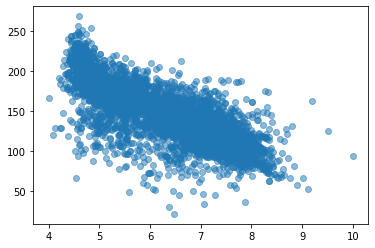

In [9]:
plt.scatter(x=data['movie_rating'], y=data['time_on_site'], alpha=0.5)

plt.show()

# Binning

To quantify the relationship between movie rating (numerical) and label (categorical), we need to convert the numerical feature into a categorical feature. This activity is called binning (or discretization)

In [4]:
# Current distribution of the movie_rating feature (numerical)
data['movie_rating'].describe()

count    4325.000000
mean        6.315616
std         1.070295
min         4.000000
25%         5.370000
50%         6.470000
75%         7.170000
max        10.000000
Name: movie_rating, dtype: float64

In [5]:
def bin_rating(x):
    """
    Domain knowledge oriented discretization with the following bins:
    
        [min, 5), [5, 6), [6, max] 
        
    Remeber that [] denote inclusive, () denote exclusive.
    """
    LOWER = 5
    UPPER = 6
    
    # [min, 5)
    if x < LOWER:
        return 0
    # [5, 10)
    elif LOWER <= x < UPPER:
        return 1 
    # [10, max] 
    return 2

# apply the function on the series
data['bin_rating'] = data['movie_rating'].apply(bin_rating)

# also, print out the min/max for this feature
data

unit_price  movie_rating  time_on_site  quantity   label  bin_rating
0             25          6.98    129.402179         3     Low           2
1             25          8.09     96.931070         3     Low           2
2             25          7.56    102.937014         1     Low           2
3             25          6.83    127.514061         4     Low           2
4             20          6.34    152.369508         5     Low           2
...          ...           ...           ...       ...     ...         ...
4320          25          5.13    126.109784         6  Medium           1
4321          20          5.20     85.029748         6  Medium           1
4322          25          7.79    127.710759         4     Low           2
4323          20          5.55    125.809688         5     Low           1
4324          20          6.45     50.753158         2     Low           2

[4325 rows x 6 columns]

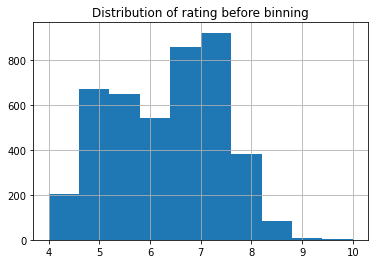

In [6]:
data['movie_rating'].hist()

plt.title('Distribution of rating before binning')

plt.show()

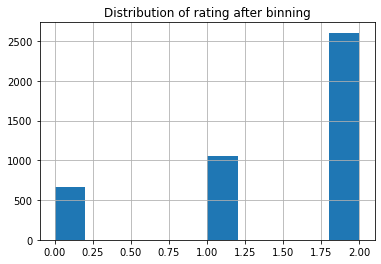

In [7]:
data['bin_rating'].hist()

plt.title('Distribution of rating after binning')

plt.show()

# Normalized Mutual Information

In [8]:
from sklearn.metrics import normalized_mutual_info_score

normalized_mutual_info_score(data['label'], 
                             data['bin_rating'],
                             average_method='min')

0.4971971011533976